In [8]:
import sys
sys.path.append("../")

import datarun

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import wofz

In [2]:
data = datarun.Experiment(
    datapath="../data/mar30/linewidth/",
    idx_start=32,
    vstart=.3,
    vend=1.0,
    vstep=.175,
    numtrials=25,
    mask=.15
)

on 25: Found 2 blobs                                                            
on 29: Found 2 blobs                                                            
on 46: array must not contain infs or NaNs                                      
|████████████████████████████████████████| 125/125 [100%] in 4:56.2 (0.42/s)    


In [3]:
def od_max(run):
    return run.popt_x[0]-run.popt_x[3]

str_dat = data.structure_data(od_max)

In [4]:
for dat in str_dat.values():
    mean = np.mean(dat)
    std = np.std(dat)
    for val in dat:
        if np.abs(val - mean) > 2*std:
            dat.remove(val)
            print("removed")

removed
removed
removed
removed
removed
removed


In [44]:
def lorentzian(x, A, w0, gamma):
    return (A*gamma/2*np.pi)/((x-w0)**2+gamma**2/4)

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def voigt(x, A, mu, gamma, sigma):
    return A*np.real(wofz(((x-mu) + 1j*gamma)/sigma/np.sqrt(2))) / sigma

In [45]:
means = np.fromiter(map(np.mean, str_dat.values()), float)
errs = np.fromiter(map(np.std, str_dat.values()), float)/5
popt_g, pcov_g = curve_fit(gaussian, data.vlist, means, sigma = errs, p0 = [20, .7, 1], absolute_sigma=True)
popt_v, pcov_v = curve_fit(voigt, data.vlist, means, sigma = errs, p0 = [20, .7, 1, 1], absolute_sigma=True)
popt_l, pcov_l = curve_fit(lorentzian, data.vlist, means, sigma = errs, p0 = [20, .7, 1], absolute_sigma=True)

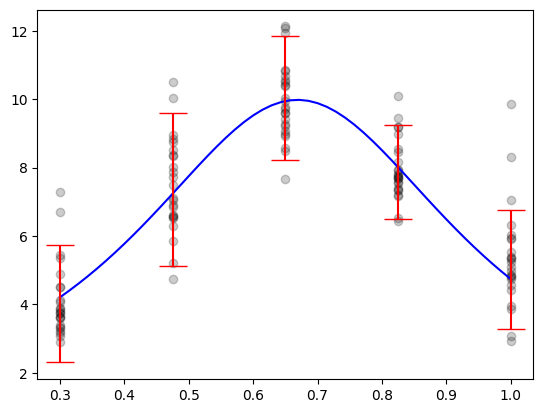

In [46]:
xax = np.linspace(min(data.vlist), max(data.vlist), 50)
plt.plot(xax, [voigt(x, *popt_v)/popt_l[0] for x in xax], color = "b")
plt.errorbar(data.vlist, means/popt_l[0], yerr = errs, linestyle = "None", color = "r", capsize=10)
for dat in data.data:
    plt.scatter(dat.value, od_max(dat)/popt_l[0], color = "k", alpha=.2, marker = "o")


In [50]:
popt[2]*6.3*2

7.933951669177655